In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.8.0'

In [4]:
tf.__version__

'2.8.0'

In [5]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

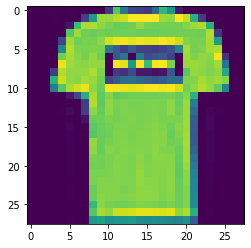

In [6]:
plt.imshow(x_train_full[1])

In [7]:
y_train_full[1]

0

In [8]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt',
            'Sneaker','Bag','Ankle boot']

In [9]:
class_names[y_train_full[10]]

'T-shirt/top'

In [10]:
x_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

### Data Normalization

In [11]:
x_train_n=x_train_full/255.
x_test_n=x_test/255.

#### split data into training set/validation

In [12]:
x_valid,x_train=x_train_n[:5000],x_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
x_test=x_test_n

In [13]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Building NN

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


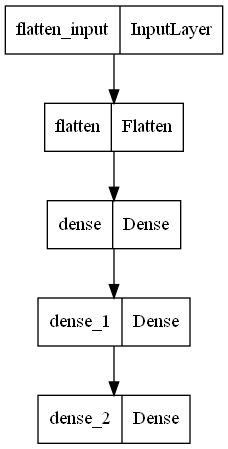

In [17]:
import pydot
keras.utils.plot_model(model)

In [18]:
weights,blases=model.layers[1].get_weights()

In [19]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
blases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
blases.shape

(300,)

### Compiling and training the NN

In [23]:
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer='sgd',
             metrics=['accuracy'])

In [24]:
model_history=model.fit(x_train,y_train,epochs=30, 
                       validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8316 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4391 - accuracy: 0.8456 - val_loss: 0.5281 - val_accuracy: 0.8008
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4123 - accuracy: 0.8566 - val_loss: 0.3920 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3939 - accuracy: 0.8619 - val_loss: 0.3746 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3752 - accuracy: 0.8677 - val_loss: 0.3719 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3632 - accuracy: 0.8715 - val_loss: 0.3612 - val_accuracy:

In [25]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [26]:
model_history.history

{'loss': [0.7237027883529663,
  0.4842100441455841,
  0.4390992820262909,
  0.4122525453567505,
  0.39386433362960815,
  0.3751608729362488,
  0.3631591498851776,
  0.35162606835365295,
  0.3413090407848358,
  0.3318001329898834,
  0.3238930106163025,
  0.3147047460079193,
  0.3079393208026886,
  0.30182531476020813,
  0.29437968134880066,
  0.2887613773345947,
  0.2837143838405609,
  0.2776796519756317,
  0.2725788950920105,
  0.2671605050563812,
  0.26216381788253784,
  0.2576014995574951,
  0.2534503638744354,
  0.2482289969921112,
  0.2442322075366974,
  0.2404686063528061,
  0.23607490956783295,
  0.23267623782157898,
  0.22828508913516998,
  0.22501735389232635],
 'accuracy': [0.7643091082572937,
  0.8315636515617371,
  0.8455818295478821,
  0.8566363453865051,
  0.8618545532226562,
  0.8677454590797424,
  0.8715272545814514,
  0.875145435333252,
  0.878818154335022,
  0.8824909329414368,
  0.8839818239212036,
  0.8866181969642639,
  0.8887818455696106,
  0.8918545246124268,
  0.

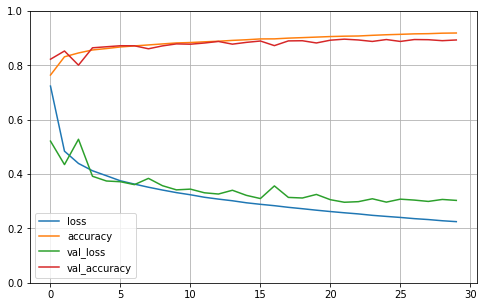

In [28]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)#x and y axis btwn (0,1)
plt.show()

### Evaluating importance and predicting using keras

In [49]:
model.evaluate(x_test,y_test)# Output is the loss and the accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.3363 - accuracy: 0.8826


[0.3363316059112549, 0.8826000094413757]

In [30]:
x_new=x_test[:3]

In [35]:
y_proba=model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [60]:
#y_pred=model.predict_classes(x_new)
#y_pred

In [45]:
classes_x=np.argmax(x_new,axis=1)

In [46]:
classes_x

array([[19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 20, 20,
        20, 20, 20, 19, 20, 20, 20, 20, 20, 20, 20, 17],
       [ 0,  0,  0,  0, 18,  6,  3, 12,  5,  4,  4,  6,  7,  1,  1,  1,
        11,  6,  5, 12,  6, 13, 21, 11, 24,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 25, 11,  3,  1,  1,  1,  6,  8,
         1, 26,  1,  5,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [54]:
y_pred = (model.predict(x_new) > 0.5).astype("int64")


In [55]:
y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [56]:
np.array(class_names)[y_pred]

array([['T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'Trouser'],
       ['T-shirt/top', 'T-shirt/top', 'Trouser', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top'],
       ['T-shirt/top', 'Trouser', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top']], dtype='<U11')

AxesImage(54,36;334.8x217.44)


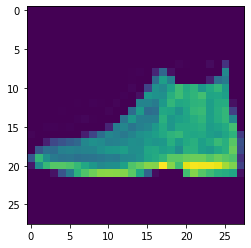

In [57]:
print(plt.imshow(x_test[0]))

AxesImage(54,36;334.8x217.44)


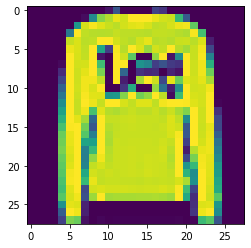

In [58]:
print(plt.imshow(x_test[1]))

AxesImage(54,36;334.8x217.44)


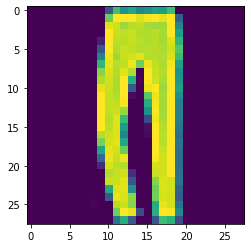

In [59]:
print(plt.imshow(x_test[2]))